In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
### 载入所有数据
table_qingkuang = pd.read_excel("zhaokaoqingkuang2.xlsx")
table_jianzhang = pd.read_excel("jianzhang.xls")
table_total = pd.merge(table_qingkuang,table_jianzhang)
table_analysis_1 = table_total[["部门名称","招考职位","招考人数","用人司局","资格审查通过人数","工作地点","职位分布","落户地点","职位代码","备注"]]

In [3]:
num_sum = sum(table_total["资格审查通过人数"]) ### 报名通过资格审查人数
num_sum/14537 ### 平均竞争比

87.4993464951503

In [4]:
### 画一个分布
from matplotlib import pyplot as plt
table_analysis_1["吃香程度"] = table_analysis_1["资格审查通过人数"] / table_analysis_1["招考人数"]
table_analysis_1 = table_analysis_1.sort_values("吃香程度",ascending = False)
table_analysis_1 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,部门名称,招考职位,招考人数,用人司局,资格审查通过人数,工作地点,职位分布,落户地点,职位代码,备注,吃香程度
8559,广东省气象局,预报股业务管理科员,1,广东省惠州市惠阳区气象局,4040,惠州市惠阳区,其他职位,惠州市惠阳区,400110009001,NaN,4040.00
8089,国家统计局云南调查总队,西双版纳调查队业务科室科员（2）,1,国家统计局云南调查总队,3662,西双版纳傣族自治州景洪市,西部地区和艰苦边远地区职位,西双版纳傣族自治州景洪市,400110125008,1.本单位最低服务年限为5年（含试用期）；\n2.限云南省户籍。,3662.00
7039,国家知识产权局,案件审理处主任科员及以下,3,商标评审委员会,9144,北京市,其他职位,北京市,400110003002,NaN,3048.00
8564,广东省气象局,站网管理股科员,1,广东省阳江阳春市气象局,2873,阳江市阳春市,其他职位,阳江市阳春市,400110013002,NaN,2873.00
5130,国家税务总局四川省税务局,科员（三）,1,国家税务总局成都市双流区税务局,2471,成都市双流区,西部地区和艰苦边远地区职位,成都市双流区,300110012003,2017年及以后年度毕业的高校毕业生,2471.00
1660,江门海关,监管,1,阳江海关,2411,广东省阳江市,其他职位,广东省阳江市,300110005001,服从关区二次分配；本科生要求全国大学英语四级考试合格，研究生要求全国大学英语六级考试合格。现...,2411.00
2883,国家税务总局上海市税务局,科员(十一),1,国家税务总局上海市长宁区税务局,2245,上海市长宁区,其他职位,上海市长宁区,300110005011,在本单位最低服务年限为5年，女性，本单位不提供宿舍,2245.00
2908,国家税务总局上海市税务局,科员(九),1,国家税务总局上海市虹口区税务局,2172,上海市虹口区,其他职位,上海市虹口区,300110008009,在本单位最低服务年限为5年，女性，本单位不提供宿舍,2172.00
2630,国家税务总局吉林省税务局,科员（二）,1,国家税务总局柳河县税务局,2023,通化市柳河县,西部地区和艰苦边远地区职位,通化市柳河县,300110503002,在本单位最低服务年限为5年,2023.00
8091,国家统计局云南调查总队,晋宁调查队科员,1,国家统计局云南调查总队,1941,昆明市晋宁区,西部地区和艰苦边远地区职位,昆明市晋宁区,400110125010,本单位最低服务年限为5年（含试用期）。,1941.00


In [5]:
plot_table1 = table_analysis_1[["部门名称","招考职位","部门名称","用人司局","吃香程度","职位分布","工作地点"]]
plot_table1.index = range(1,len(plot_table1) + 1)
plot_table1["rank"] = plot_table1.index
plot_table1["吃香程度"].mean()
# > mean 2555 rows 
# < mean 7102 rows
# == 0 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


98.14876000562101

In [6]:
plot_table2 = plot_table1.groupby(["吃香程度"]).count()
plot_table2["吃香程度"] = plot_table2.index
plot_table2.index = range(len(plot_table2))
plot_table2.drop(["rank"],axis = 1,inplace = True)
plot_table2 = plot_table2[["招考职位","吃香程度"]]

In [7]:
plot_table2.columns = ["pos_nums","degree"]

In [8]:
T = list(plot_table1[plot_table1["职位分布"] == "西部地区和艰苦边远地区职位"]["吃香程度"] > 10)

In [9]:
from collections import Counter

Counter(T) 

Counter({False: 528, True: 2913})

In [10]:
sumn = 0
n = 0
for pn,de in zip(plot_table2["pos_nums"],plot_table2["degree"]):
    sumn += pn * de
    n += pn
meannum = sumn/n
meannum 
# plot_table1[plot_table1["吃香程度"] == 0]
# > mean 2555 rows 
# < mean 7102 rows
# == 0 315 rows

98.14876000562099

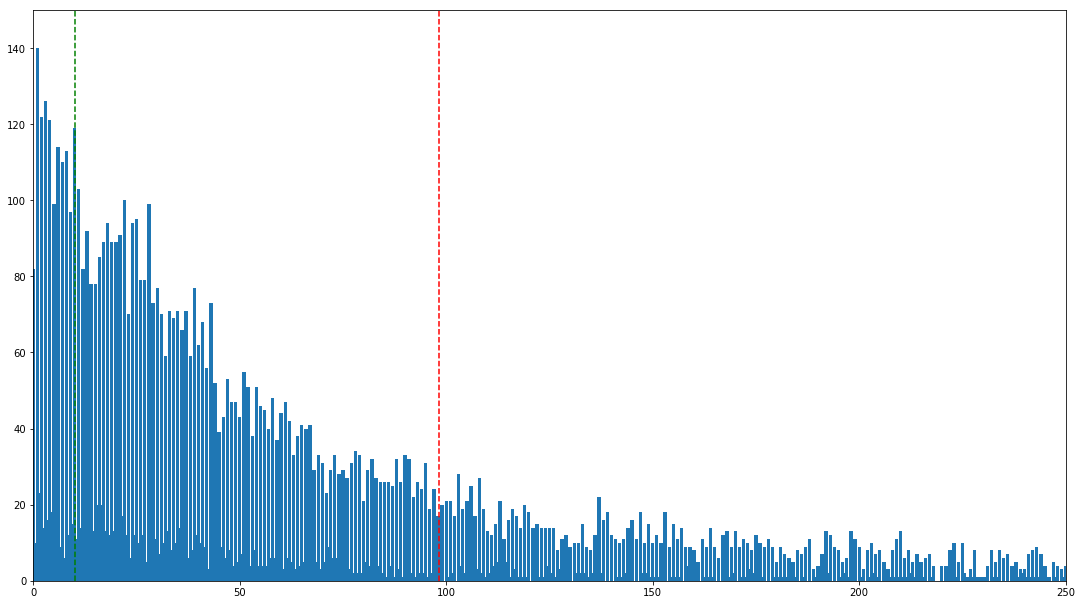

In [11]:
subplot = plt.bar(plot_table2["degree"],plot_table2["pos_nums"])
mean_num = plot_table2["pos_nums"].mean()
#plt.plot(plot_table1["rank"],plot_table1["吃香程度"])

plt.vlines(10, 0, 10000, colors = "g", linestyles = "dashed")
plt.vlines(meannum, 0, 10000, colors = "r", linestyles = "dashed")

my_x_ticks = plot_table2["degree"]

plt.xlim((0, 250))
plt.ylim((0, 150))
plt.xlabel = [0,10,20,30,40]

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [12]:
len(plot_table1[plot_table1["吃香程度"] > meannum]["rank"])/len(plot_table1["吃香程度"])

0.2732732732732733

In [13]:
len(plot_table1[plot_table1["吃香程度"] > 10]["rank"])/len((plot_table1["吃香程度"]))

0.8451900176038107

In [14]:
len(plot_table1[plot_table1["吃香程度"] == 0]["rank"])

82

In [15]:
len(plot_table1[plot_table1["吃香程度"] < 6.05]["招考职位"])/len((plot_table1["吃香程度"]))

0.10117013565289427

In [16]:
import re
plot_table2 = plot_table1[plot_table1["吃香程度"] <6.05]
plot_table2 = plot_table2.T.drop_duplicates().T
plot_table2["部门分类"] = plot_table2["部门名称"].apply(lambda x:re.search('((税务局)|(海关)|(海事局)|(水利部)|(国家知识产权局)|(公安局)|(气象局)|(调查总队)|(监管局))',x))

In [17]:
len(plot_table1[plot_table1["吃香程度"] < 6.05]["招考职位"])/len((plot_table1["吃香程度"]))

0.10117013565289427

In [18]:
list_result = []
for item in plot_table2["部门分类"]:
    if item != None:
        list_result.append(item.group())
    else:
        list_result.append("其他")

In [19]:
plot_table2["部门分类"] = list_result
low_welcome_mean = plot_table2.groupby("部门分类")["吃香程度"].sum() / plot_table2.groupby("部门分类")["吃香程度"].count()
#low_welcome_mean.to_excel("high_welcome_mean.xlsx")

In [20]:
#plot_table2["部门分类"] = list_result
#plot_table2[plot_table2["部门分类"] == "税务局"]
#plot_table3 = plot_table1[["部门名称","招考职位","用人司局","吃香程度","工作地点"]]
#plot_table3 = plot_table3.T.drop_duplicates().T
#plot_table3
#plot_table4 = plot_table3[plot_table3["职位分布"] == "西部地区和艰苦边远地区职位"]

plot_table1[plot_table1["职位分布"] == "西部地区和艰苦边远地区职位"][["用人司局","吃香程度","工作地点"]].to_excel("zhiwei.xlsx")

In [21]:
table_a = plot_table1[plot_table1["职位分布"] == "西部地区和艰苦边远地区职位"].groupby("吃香程度").count()
table_b = plot_table1[plot_table1["职位分布"] == "其他职位"].groupby("吃香程度").count()

In [22]:
table_a["吃香程度"] = table_a.index
table_b["吃香程度"] = table_b.index

In [23]:
table_a = table_a[["rank","吃香程度"]]
table_b = table_b[["rank","吃香程度"]]

In [24]:
table_a.columns = ["pos_nums","degree"]
table_b.columns = ["pos_nums","degree"]

In [25]:
table_a

,pos_nums,degree
吃香程度,,
0.000000,28,0.000000
0.250000,1,0.250000
0.500000,4,0.500000
0.666667,1,0.666667
1.000000,57,1.000000
1.181818,1,1.181818
1.230769,1,1.230769
1.250000,3,1.250000
1.333333,2,1.333333


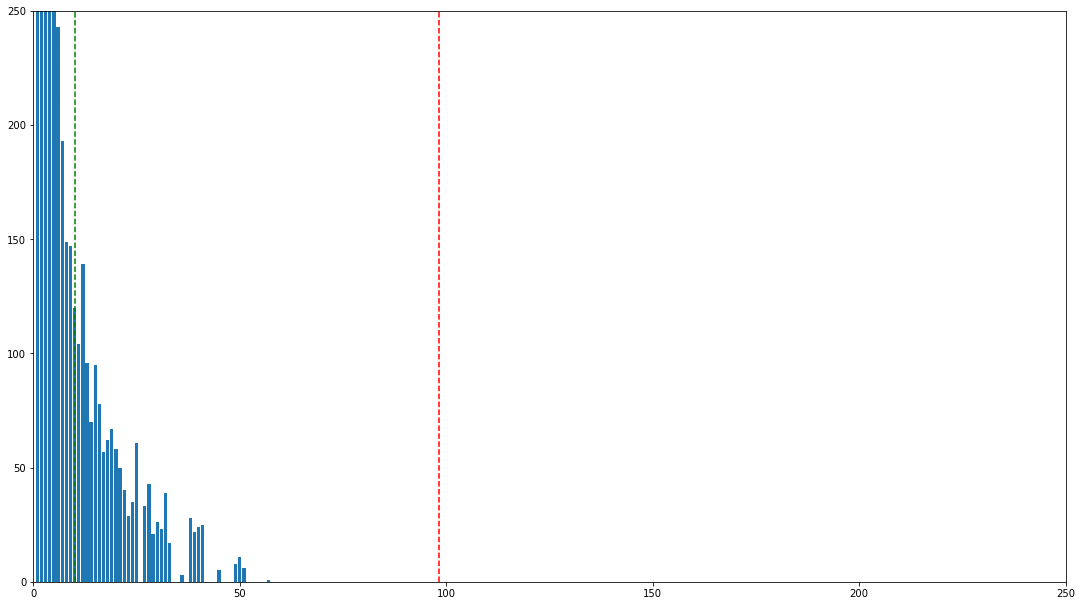

In [26]:
subplot1 = plt.bar(list(table_a["pos_nums"]),list(table_a["degree"]))
mean_num = table_a["pos_nums"].mean()

plt.vlines(10, 0, 10000, colors = "g", linestyles = "dashed")
plt.vlines(meannum, 0, 10000, colors = "r", linestyles = "dashed")

my_x_ticks = table_a["degree"]

plt.xlim((0, 250))
plt.ylim((0, 250))
plt.xlabel = [0,10,20,30,40]

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

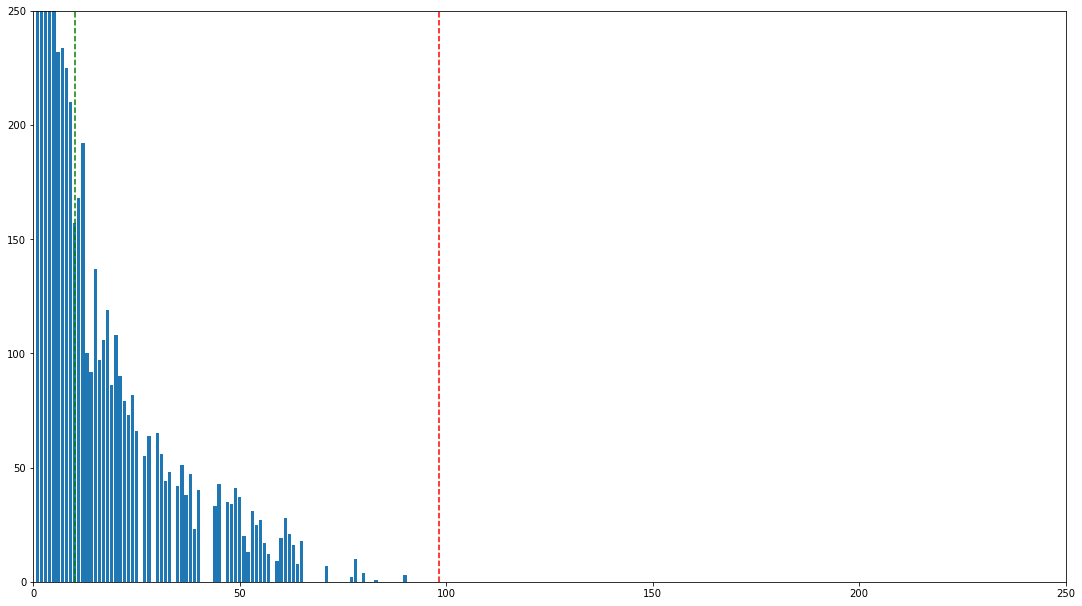

In [27]:
subplot2 = plt.bar(list(table_b["pos_nums"]),list(table_b["degree"]))
mean_num = table_a["pos_nums"].mean()

plt.vlines(10, 0, 10000, colors = "g", linestyles = "dashed")
plt.vlines(meannum, 0, 10000, colors = "r", linestyles = "dashed")

my_x_ticks = table_a["degree"]

plt.xlim((0, 250))
plt.ylim((0, 250))
plt.xlabel = [0,10,20,30,40]

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [28]:
plt.bar(list(table_a["pos_nums"]),list(table_a["pos_nums"]))

<Container object of 711 artists>

In [29]:
plot_table2.groupby("部门分类").count()

,部门名称,招考职位,用人司局,吃香程度,职位分布,工作地点,rank
部门分类,,,,,,,
公安局,79,79,79,79,79,79,79
其他,89,89,89,89,89,89,89
国家知识产权局,1,1,1,1,1,1,1
气象局,159,159,159,159,159,159,159
水利部,31,31,31,31,31,31,31
海事局,348,348,348,348,348,348,348
海关,62,62,62,62,62,62,62
监管局,58,58,58,58,58,58,58
税务局,22,22,22,22,22,22,22


In [30]:
from cpca import *
df = transform(plot_table1["工作地点"])
plot_table1["省"] = df["省"]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\DFUSER~1.DEL\AppData\Local\Temp\jieba.cache
Loading model cost 0.747 seconds.
Prefix dict has been built succesfully.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
plot_table1.groupby("省").mean().sort_values(by = "吃香程度",ascending = False)

,吃香程度,rank
省,,
云南省,215.346741,3347.333333
贵州省,147.737149,3745.839080
北京市,140.436184,3670.679315
青海省,132.722619,3498.833333
广东省,122.613888,4511.583241
重庆市,116.726404,3432.436842
四川省,113.925482,4739.489474
西藏自治区,108.273995,4422.574468
江苏省,97.135732,5019.720588


In [32]:
from cpca import *

In [33]:
haishiju = pd.read_excel("haishiju.xlsx")
tongjiju = pd.read_excel("tongjiju.xlsx")
qixiangju = pd.read_excel("qixiangju.xlsx")

In [34]:
haishiju_table = haishiju[["职位简介","专业","竞争比"]]

In [35]:
from collections import Counter
dict(Counter(haishiju_table[haishiju_table["竞争比"] < 8]["职位简介"]))

{'主要从事基层海事执法工作': 176,
 '主要从事海事业务管理工作': 2,
 '主要从事海事综合管理工作': 13,
 '办公室从事档案管理相关工作': 1,
 '基层一线海事执法，需上船工作，按照国家规定发放工资待遇。': 27,
 '基层一线海事执法，需经常上船，适合男性，按国家规定发放工资待遇': 33,
 '基层海事执法': 105,
 '海事业务管理': 2,
 '海事处从事三峡枢纽过闸安检工作': 10,
 '海事处从事海事管理工作': 1,
 '海事现场执法': 6,
 '海事综合管理': 3,
 '船舶交通管理中心海事监管，工作性质为交管中心值班岗位，五班三运转。适合男性，按国家规定发放工资待遇。': 4}

In [36]:
list_totalsplit = []
for item in list(haishiju_table[haishiju_table["竞争比"] > 230]["专业"]):
    if "、" in item:
        list_split = item.split("、")
        list_totalsplit.append(list_split)
    else:
        list_totalsplit.append([item])

In [37]:
list_sp = []
for i in list_totalsplit:
    for j in i:
        list_sp.append(j)

In [38]:
pd.DataFrame([dict(Counter(list_sp))]).T.sort_values(by = 0,ascending = False)

,0
会计学,7
化学工程与工艺,6
财务管理,6
审计学,6
财政学类,6
化学类,6
环境科学与工程类,6
工商管理类,5
金融学类,5
土木工程,4


In [39]:
pd.DataFrame(tongjiju[tongjiju["竞争比"] < 6]["基层工作最低年限"]).describe()

,基层工作最低年限
count,115
unique,4
top,二年
freq,75


In [58]:
pd.DataFrame(qixiangju[qixiangju["竞争比"] > 230]["职位属性"]).count()

职位属性    57
dtype: int64

In [59]:
table_qixiangju_ana = pd.DataFrame(qixiangju[qixiangju["竞争比"] > 230])

In [60]:
print(len(table_qixiangju_ana[table_qixiangju_ana["专业"] == "大气科学类"]["专业"])) 

print(len(table_qixiangju_ana["专业"]))

0
57
